# شبکه های برگشتی   

# Recurent Nural Network=====>>> RNN  

# Long Short Term Memory=====>>>LSTM

# Gated Recurrent Unit========>GRU

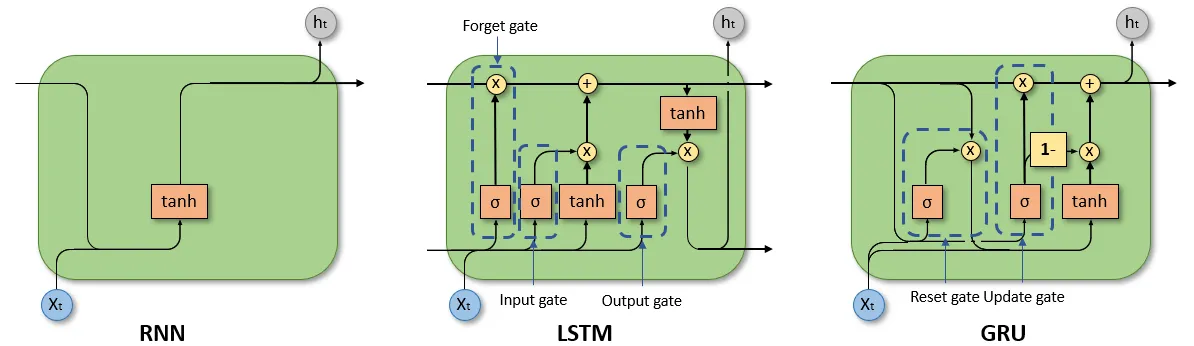

# RNN

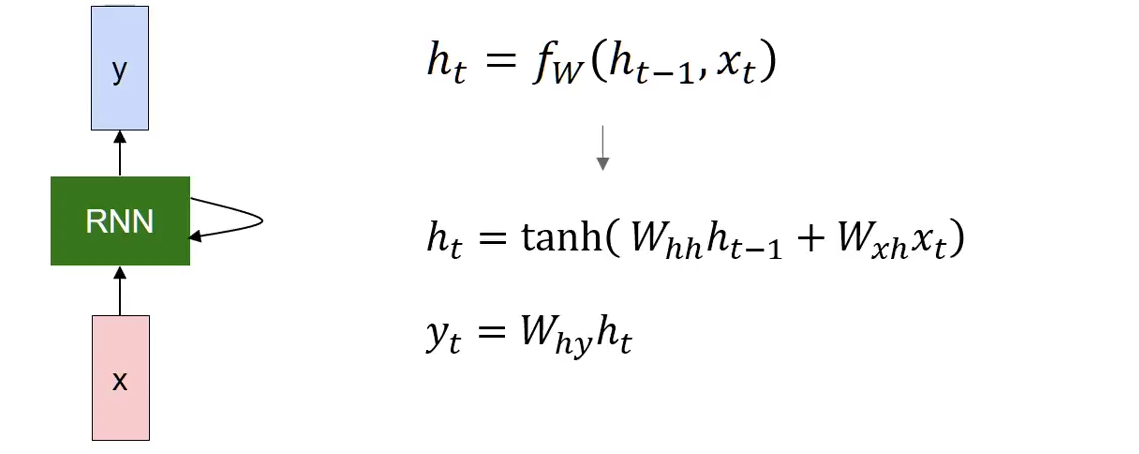

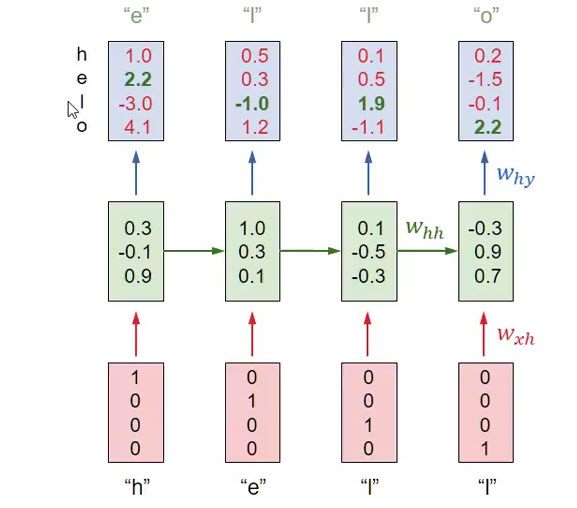

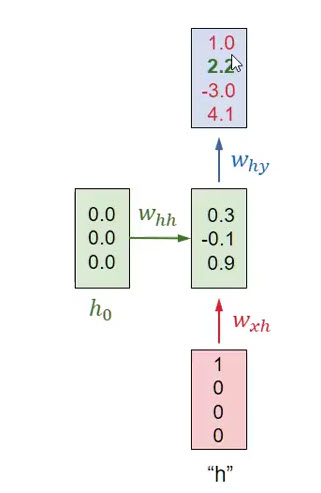

# LSTM

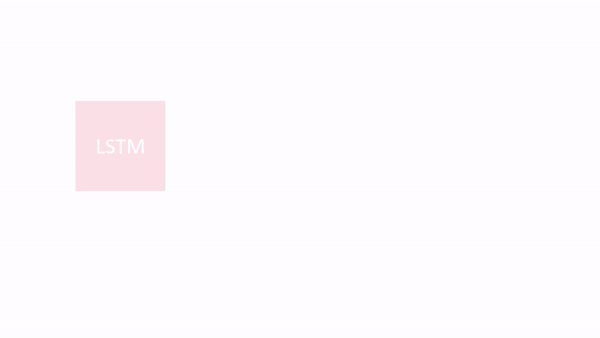

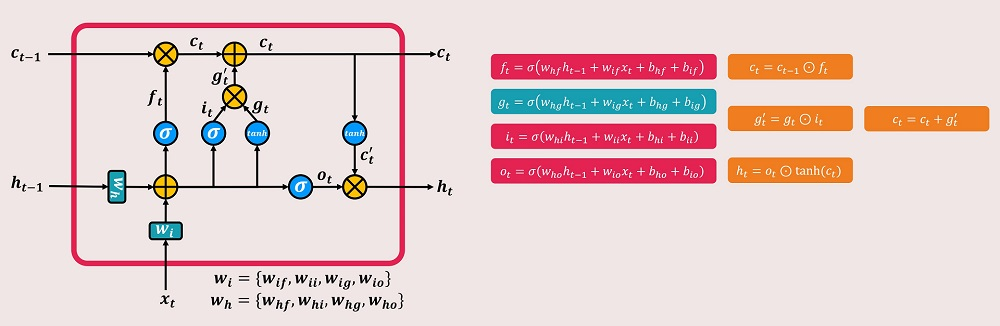

# GRU

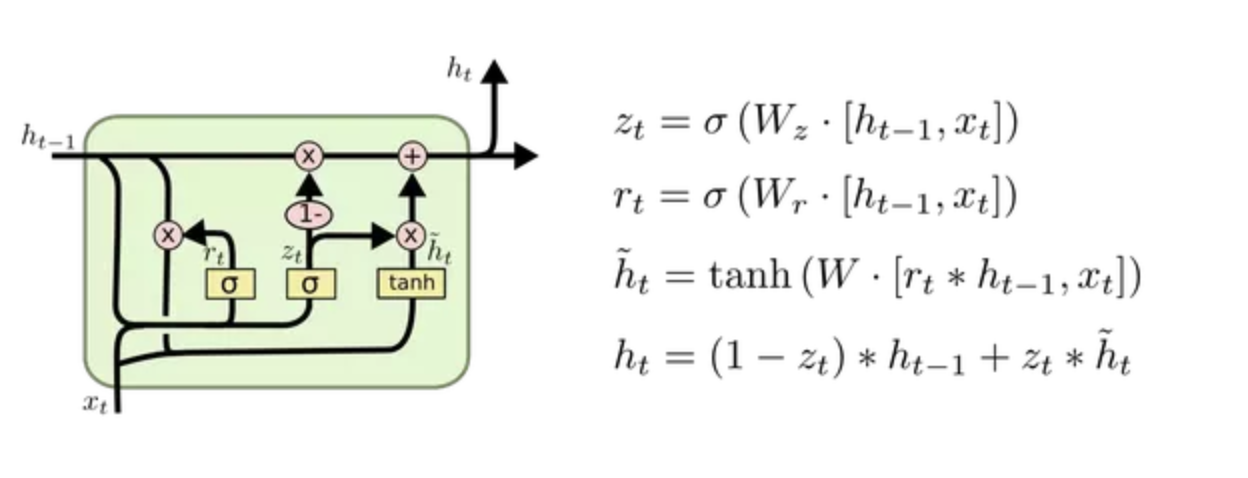

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt


# Data

In [2]:
train_ds=dataset.CIFAR10(root='/root',train=True,transform=transforms.ToTensor(),download=True)
test_ds=dataset.CIFAR10(root='/root',train=False,transform=transforms.ToTensor(),download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
batch_size=32
train_dl=DataLoader(dataset=train_ds,batch_size=batch_size,shuffle=True,num_workers=2)
test_dl=DataLoader(dataset=test_ds,batch_size=batch_size,shuffle=True,num_workers=2)

In [4]:
image,target=next(iter(train_dl))

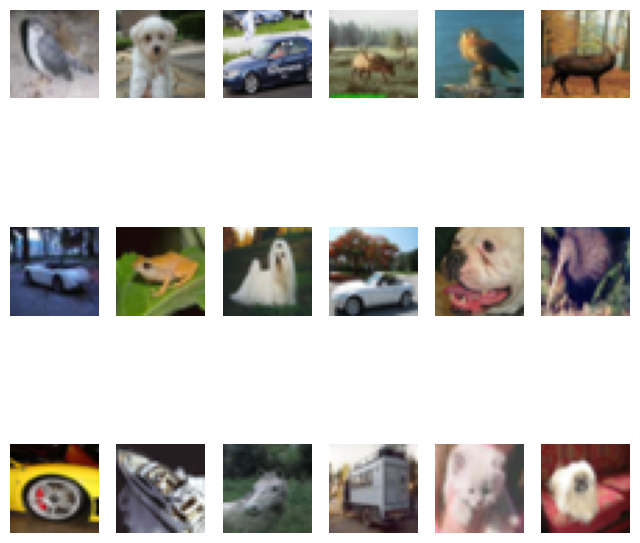

In [6]:
image,target=next(iter(train_dl))
plt.figure(figsize=(8,8))
for i in range(18):
    plt.subplot(3,6,i+1)
    img=torch.transpose(image[i],0,1)
    img=torch.transpose(img,1,2)
    plt.imshow(img)
    plt.axis('off')
plt.show()  

In [5]:
image.shape

torch.Size([32, 3, 32, 32])

In [13]:
image.permute(0,2,3,1).flatten(2).shape

torch.Size([32, 32, 96])

In [ ]:
# RNN input==> batch_size,seq,feature

In [14]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [37]:
class RNN(nn.Module):
    def __init__(self,input_feature,hidden_size=256,num_layer=2,num_class=10):
        super(RNN,self).__init__()
        self.hidden_size=hidden_size
        self.num_layer=num_layer
        self.rnn=nn.GRU(input_feature,hidden_size,num_layer,batch_first=True)
        self.fc1=nn.Linear(in_features=hidden_size,out_features=num_class)
        
        
    def forward(self,x):
        x=x.permute(0,2,3,1).flatten(2)
        h0=torch.randn(self.num_layer,x.size(0),self.hidden_size).to(device)
        #c0=torch.randn(self.num_layer,x.size(0),self.hidden_size).to(device)
        out,_=self.rnn(x,h0)
        out=self.fc1(out[:,-1,:])
        return out
        
        
        

In [38]:
#batch,seq,input_f
#batch,seq,Hidden_out

In [39]:
model=RNN(input_feature=96).to(device)

In [40]:
citerion=nn.CrossEntropyLoss()

In [41]:
optimizer=optim.Adam(params=model.parameters(),lr=0.001)

In [42]:
epoch=6

In [43]:
model.train()
for i in range(epoch):
    sumLoss=0
    for idx,(image,target) in enumerate(train_dl):
        
        image=image.to(device)
        target=target.to(device)
        
        optimizer.zero_grad()
        
        score=model(image)
        loss=citerion(score,target)
        
        sumLoss+=loss
        
        loss.backward()
        
        optimizer.step()
        
    print(f'in epoch number {i+1} is equal to { sumLoss }')

in epoch number 1 is equal to 2670.1064453125
in epoch number 2 is equal to 2138.406982421875
in epoch number 3 is equal to 1877.4586181640625
in epoch number 4 is equal to 1702.56591796875
in epoch number 5 is equal to 1568.31201171875
in epoch number 6 is equal to 1459.359130859375


In [25]:
def check_accuracy(dataloader,model):
    if dataloader.dataset.train:
        print('accuracy on train data')
    else :
        print('accuracy on test data')
    
    num_correct=0
    all_sample=0
    
    model.eval()
    
    with torch.no_grad():
        for x,y in dataloader:
            x=x.to(device)
            y=y.to(device)
            
            score=model(x)
            _,pred=score.max(1)
            
            num_correct+=(pred==y).sum()
            all_sample+=len(y)
    
    print(f'accuracy is { num_correct/all_sample }')

In [44]:
check_accuracy(train_dl,model)

accuracy on train data
accuracy is 0.6944199800491333


In [45]:
check_accuracy(test_dl,model)

accuracy on test data
accuracy is 0.6060999631881714
